In [38]:
import  pandas as pd 
df = pd.read_csv('tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Задание 1 
Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150

In [4]:
df.shape

(244, 7)

Задание 2 
Напишите максимальную сумму счёта в датафрейме. Ответ введите с точностью до двух цифр после запятой, например, 100.55

In [5]:
df.total_bill.max()

50.81

In [3]:
%matplotlib inline

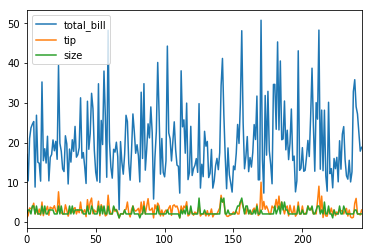

In [7]:
df.plot()

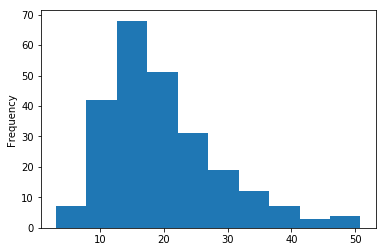

In [4]:
df['total_bill'].plot(kind = 'hist')

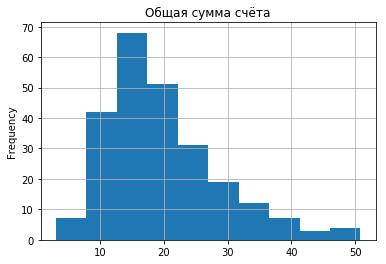

In [10]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

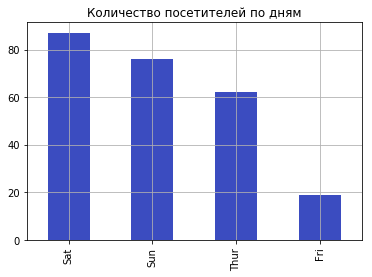

In [6]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

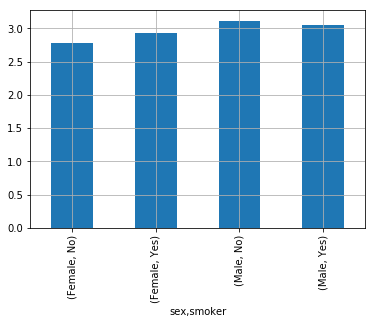

In [11]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9CD9D5240>,
      dtype=object)

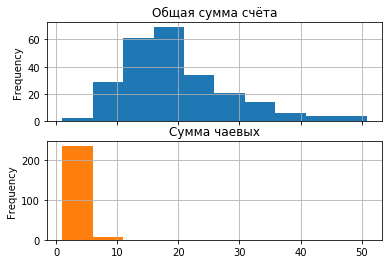

In [12]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

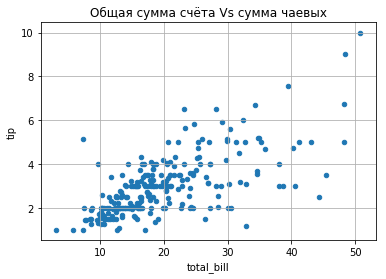

In [13]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

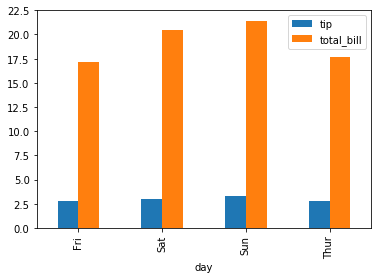

In [14]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

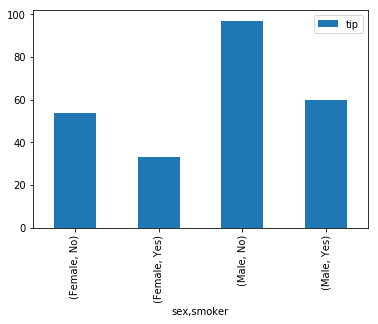

In [15]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

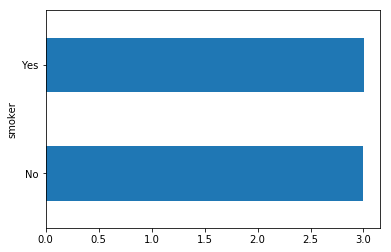

In [16]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh') 

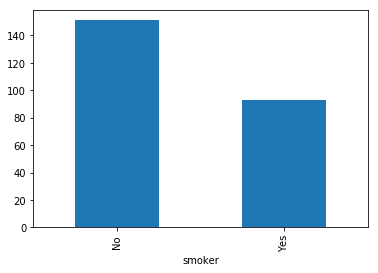

In [17]:
df.groupby('smoker')['tip'].count().plot(kind = 'bar') 

7.4 Объектно-ориентированный подход

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.xls')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

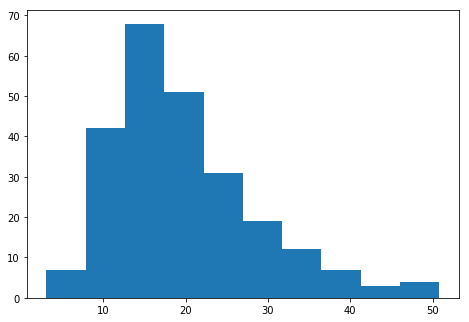

In [21]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

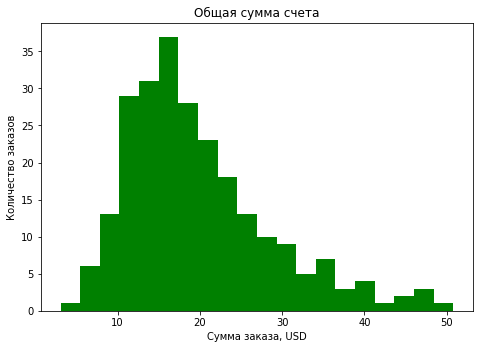

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

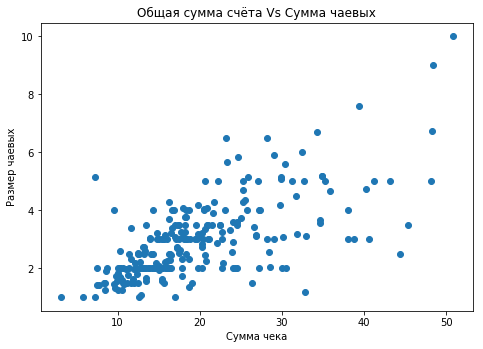

In [23]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

7.5 Несколько систем координат

Задание:
В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета»,
а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. 
Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

<BarContainer object of 4 artists>

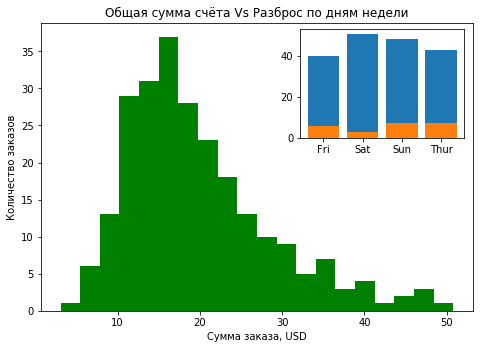

In [47]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'], bins = 20, color = 'green')  #применим метод hist
main_axes.set_title('Общая сумма счёта Vs Разброс по дням недели')
main_axes.set_xlabel('Сумма заказа, USD')
main_axes.set_ylabel('Количество заказов')

tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index() #вспом. датафрейм

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])     #применим метод bar
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

<BarContainer object of 4 artists>

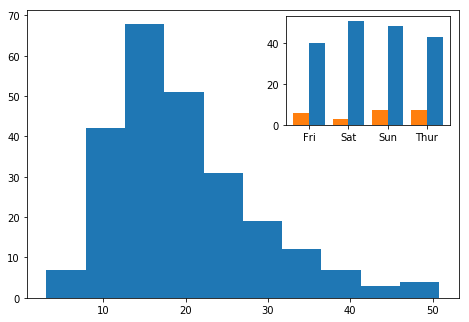

In [48]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

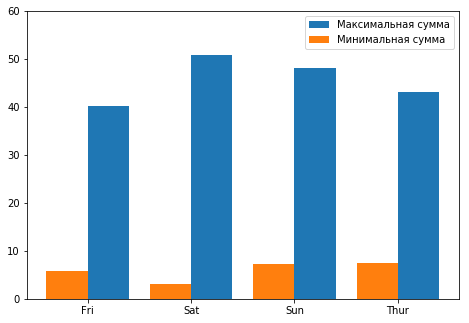

In [59]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0,60)       #чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат
axes.bar(x = tips_per_day['day'],
         height = tips_per_day['max'], 
         width = 0.4, align = 'edge',
         label='Максимальная сумма') #для корректного отображения данных в легенде необходимо добавить параметр label
axes.bar(x = tips_per_day['day'],
         height = tips_per_day['min'], 
         width = -0.4, align = 'edge',
         label='Минимальная сумма')
axes.legend(loc=1)    #размещения легенды на координатной плоскости задаётся с помощью параметра loc

Text(0.5, 1.0, 'Общая сумма счета vs Сумма чаевых')

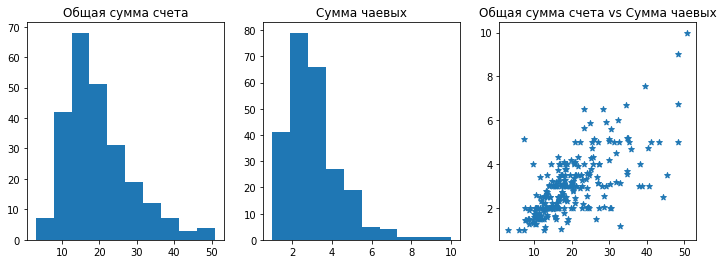

In [62]:
fig, axes=plt.subplots(1,3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='*')
axes[2].set_title('Общая сумма счета vs Сумма чаевых')


7.8 Создание линейных графиков

In [64]:
import numpy as np 

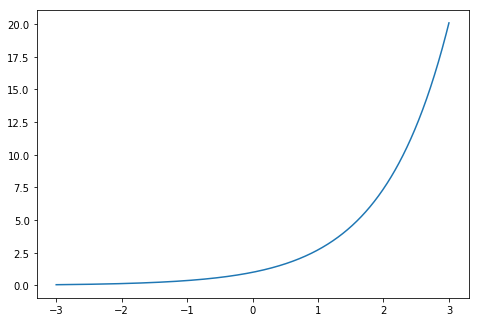

In [65]:
x = np.linspace(start=-3., stop=3., num=1000)   #сгенерируем массив из 1000 чисел, равн.распределённых в интервале от -3 до 3. 
y1 = np.exp(x)  #создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)   #позволяет отрисовать последовательность значений

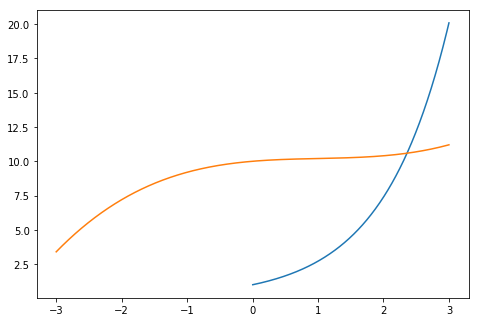

In [66]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

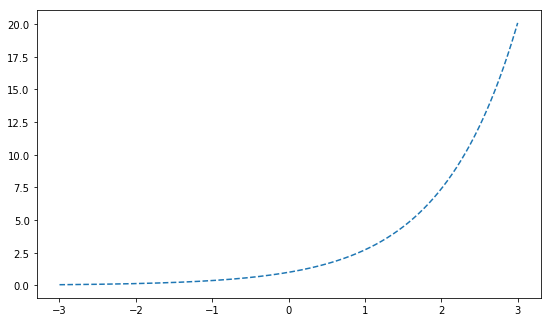

In [67]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

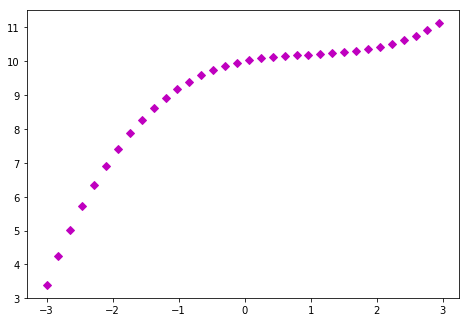

In [70]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
import warnings; warnings.simplefilter('ignore')  #отключаем сообщения, что метод применяется к определенному типу данных

In [ ]:
df = pd.read_csv('tips.xls')

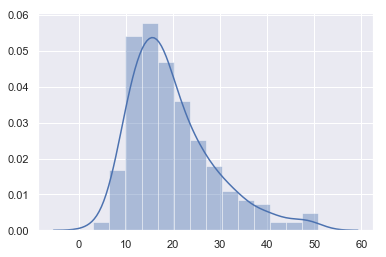

In [74]:
sns.set()
sns.distplot([df['total_bill']])

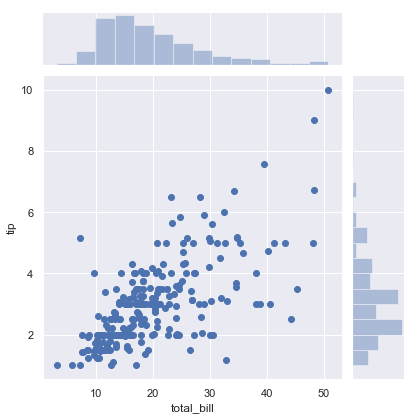

In [76]:
sns.jointplot(x='total_bill', y='tip', data=df)

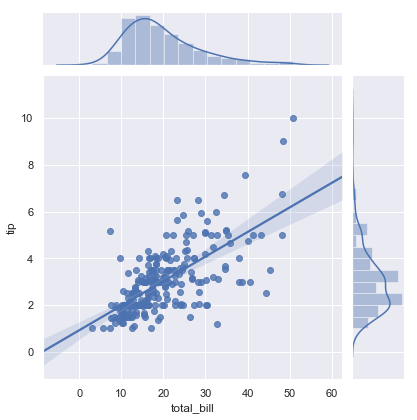

In [77]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

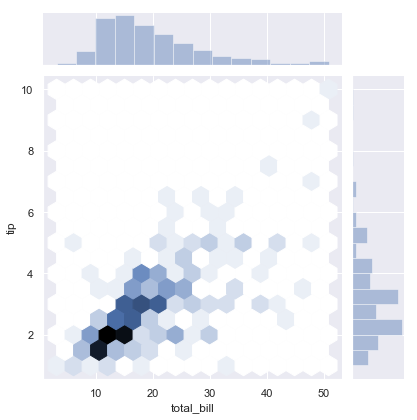

In [79]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

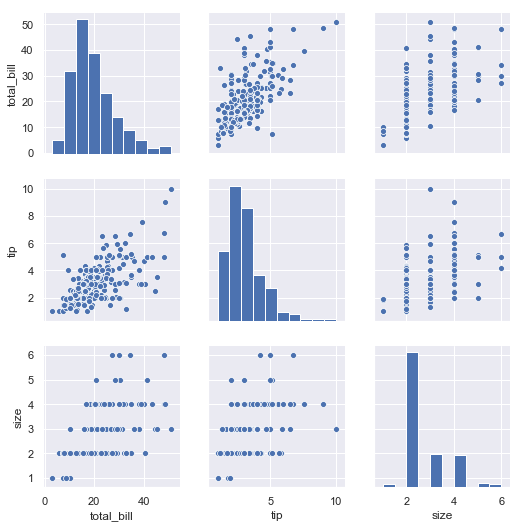

In [78]:
sns.pairplot(df)

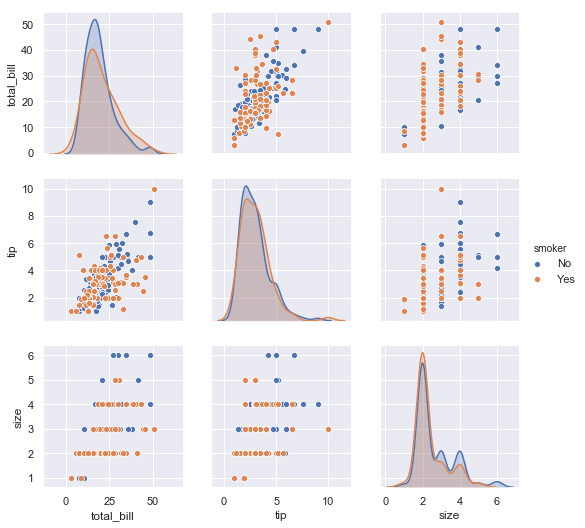

In [90]:
sns.pairplot(df, hue='smoker')

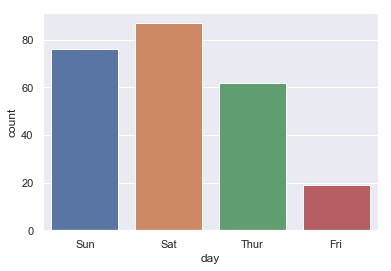

In [80]:
sns.countplot(x='day', data =df)

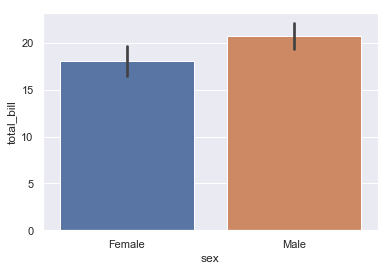

In [87]:
sns.barplot(x='sex', y='total_bill', data =df)

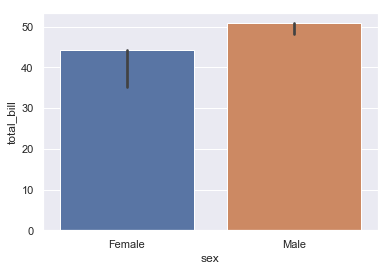

In [86]:
sns.barplot(x='sex', y='total_bill', data =df, estimator=max)

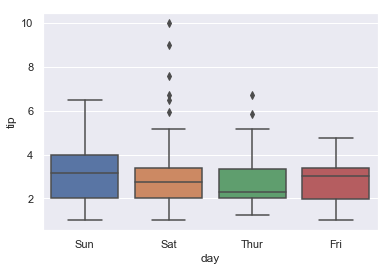

In [88]:
sns.boxplot(x='day', y='tip', data=df)

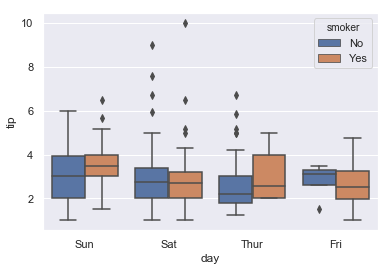

In [89]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

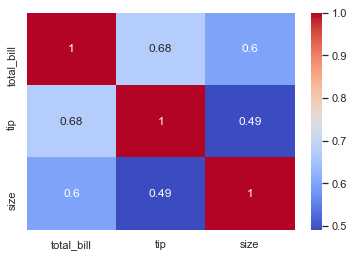

In [91]:
correlation=df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [92]:
!pip install plotly

  Stored in directory: C:\Users\Vika\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [96]:
!pip install cufflinks

In [97]:
import pandas as pd
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [98]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [99]:
init_notebook_mode(connected = True)
cf.go_offline()

NameError: name 'init_notebook_mode' is not defined

In [100]:
df.iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'